In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.linear_models.linear_regression import LinearRegression
from allison.utils.functions.loss import mean_square_error
from allison.utils.metrics import r2_score
from allison.utils.functions.data import train_test_split

In [3]:
n = 1000
x=np.linspace(2,20,n)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,5.766723
1,2.018018,7.712538
2,2.036036,6.634294
3,2.054054,6.523052
4,2.072072,5.376593


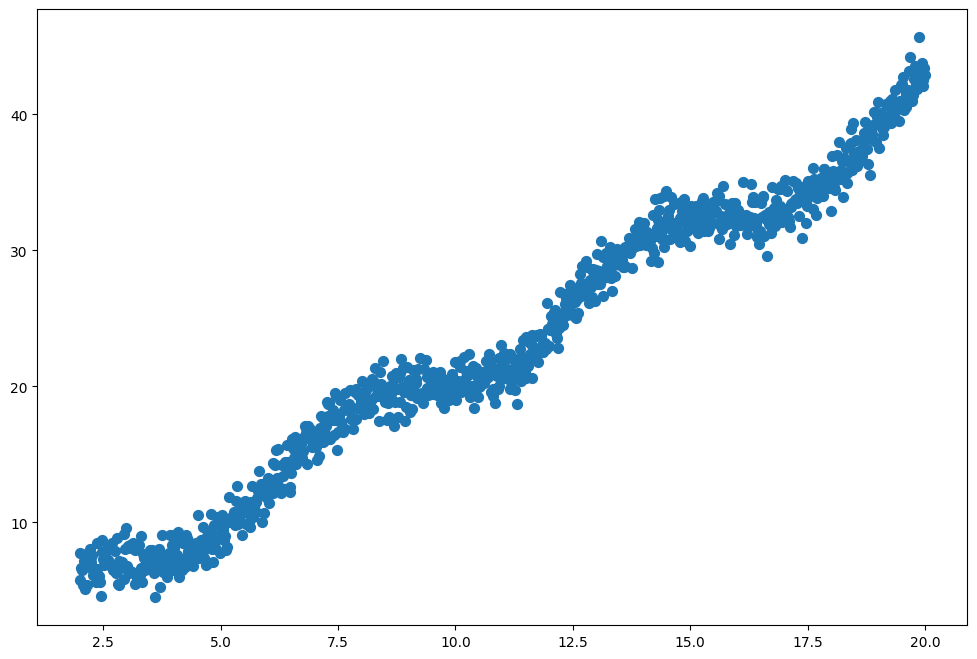

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [5]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [6]:
model=LinearRegression(loss_function=mean_square_error,
                      metric=r2_score,
                      lr = 0.001)

model.train(X_train, y_train,n_iters=20, history_train=True)

Iter:	2	==================================================>	 mean_square_error: 241.586% 	 r2_score: -115.36% 

Iter:	4	==================================================>	 mean_square_error: 80.395% 	 r2_score: 28.33% 

Iter:	6	==================================================>	 mean_square_error: 28.093% 	 r2_score: 74.96% 

Iter:	8	==================================================>	 mean_square_error: 11.089% 	 r2_score: 90.11% 

Iter:	10	==================================================>	 mean_square_error: 5.541% 	 r2_score: 95.06% 

Iter:	12	==================================================>	 mean_square_error: 3.721% 	 r2_score: 96.68% 

Iter:	14	==================================================>	 mean_square_error: 3.117% 	 r2_score: 97.22% 

Iter:	16	==================================================>	 mean_square_error: 2.913% 	 r2_score: 97.40% 

Iter:	18	==================================================>	 mean_square_error: 2.842% 	 r2_score: 97.47% 

Iter:	20	=======

In [7]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [241.585786284114,
  80.3950636755872,
  28.093352055511897,
  11.089040145402343,
  5.541357731581661,
  3.7205197118787026,
  3.1167421122733425,
  2.9130844000649985,
  2.8424746037228568,
  2.816948538328942],
 'precision': [-115.35611823245642,
  28.333661079446927,
  74.95682448926144,
  90.11492903879189,
  95.06028351598718,
  96.68342788174115,
  97.22165159981124,
  97.40319760474759,
  97.46614109113113,
  97.48889571772375],
 'params': [{'bias': array([0.98996023]), 'weights': array([0.32235384])},
  {'bias': array([1.05486017]), 'weights': array([1.03885499])},
  {'bias': array([1.09177961]), 'weights': array([1.44644896])},
  {'bias': array([1.11278187]), 'weights': array([1.67831577])},
  {'bias': array([1.12472936]), 'weights': array([1.81021719])},
  {'bias': array([1.1315259]), 'weights': array([1.88525157])},
  {'bias': array([1.13539223]), 'weights': array([1.92793617])},
  {'bias': array([1.13759165]), 'weight

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_train, y_train, s=50)
    if i > 0:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, r2 = {history["precision"][i-1]:.2f}%')
    else:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()



# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)

plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())

In [9]:
r2_score =model.evaluate(X_test, y_test)
r2_score

97.04763591375648

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:97.05%)')

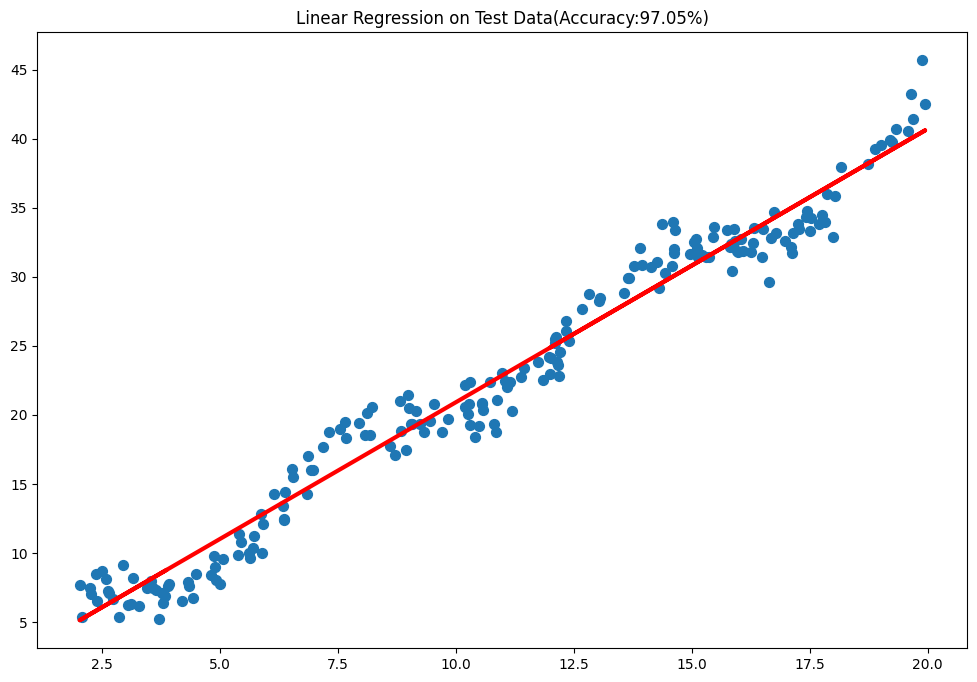

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{r2_score:.2f}%)')